# nba数据分析报告【面试】

# 数据来源
* 2018-19NBA球员数据来源：
    * https://nba.hupu.com/stats/players
    * 通过pd.read_html()采集
    * 保存为hupu2018-19NBA.csv
* 2017-18NBA球队数据来源
    * 采用[Basketball Reference.com](https://www.basketball-reference.com/)中的统计数据。
    * 会使用2017-18 NBA Season Summary中 Team Per Game Stats（每支队伍平均每场比赛的表现统计）
    

# 分析目标
* 本赛季勒布朗詹姆斯，转会湖人，分析2018-19赛季，湖人队得分能力
* 本赛季  各球队球员得分能力分布情况 分析

    
# 指标解释

* 分析中所出现的专有名词

| 数据名                             | 含义                       | 数据吗                     | 含义         |
| :--------------------------------- | -------------------------- | -------------------------- | ------------ |
| Rk -- Rank                         | 球队排名                       | PTS -- Points              | 得分         |
| G -- Games                         | 参与的比赛场数（都为82场） | PF -- Personal Fouls       | 个犯         |
| MP -- Minutes Played               | 平均每场比赛进行的时间     | TOV -- Turnovers           | 失误         |
| FG--Field Goals                    | 投球命中次数               | BLK -- Blocks              | 盖帽         |
| FGA--Field Goal Attempts           | 投射次数                   | STL--Steals                | 抢断         |
| FG%--Field Goal Percentage         | 投球命中次数               | AST--Assists               | 助攻         |
| 3P--3-Point Field Goals            | 三分球命中次数             | TRB--Total Rebounds        | 篮板球总数   |
| 3PA--3-Point Field Goal Attempts   | 三分球投射次数             | DRB--Defensive Rebounds    | 防守篮板球   |
| 3P%--3-Point Field Goal Percentage | 三分球命中率               | ORB--Offensive Rebounds    | 进攻篮板球   |
| 2P--2-Point Field Goals            | 二分球命中次数             | FTA--Free Throw Attempts   | 罚球投射次数 |
| 2PA--2-point Field Goal Attempts   | 二分球投射次数             | FT--Free Throws            | 罚球命中次数 |
| 2P%--2-Point Field Goal Percentage | 二分球命中率               | FT%--Free Throw Percentage | 罚球命中率   |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 本次数据分析基本流程

**1. 数据清洗、整理**

**2. 数据分析和可视化**

**3. 球员k均值聚类模型**

## 2018-19赛季 球员数据

In [3]:
'''
for i in range(1,6):
    try:
        data = pd.read_html('https://nba.hupu.com/stats/players/{}'.format(i))
    except:
        data = pd.read_html('https://nba.hupu.com/stats/players/{}'.format(i),encoding='gbk')
    data_list.append(data)
    
len(data_list)
data = pd.concat(data_list)
data.to_csv('hupu2018-19NBA.csv')
'''

"\nfor i in range(1,6):\n    try:\n        data = pd.read_html('https://nba.hupu.com/stats/players/{}'.format(i))\n    except:\n        data = pd.read_html('https://nba.hupu.com/stats/players/{}'.format(i),encoding='gbk')\n    data_list.append(data)\n    \nlen(data_list)\ndata = pd.concat(data_list)\ndata.to_csv('hupu2018-19NBA.csv')\n"

In [4]:
nba8_9 = pd.read_csv('hupu2018-19NBA.csv',index_col=0,header=1)

In [5]:
nba8_9.head()

,排名,球员,球队,得分,命中-出手,命中率,命中-三分,三分命中率,命中-罚球,罚球命中率,场次,上场时间
0,,,,,,,,,,,,
1,1,詹姆斯-哈登,火箭,36.50,10.70-24.10,44.2%,4.90-13.30,37%,10.30-11.80,86.7%,50,37.50
2,2,安东尼-戴维斯,鹈鹕,29.30,10.50-20.60,50.8%,1.00-3.00,32.5%,7.40-9.10,81.2%,41,37.00
3,3,斯蒂芬-库里,勇士,29.20,9.80-19.80,49.3%,5.20-11.60,45.1%,4.40-4.80,92.3%,41,34.30
4,4,保罗-乔治,雷霆,28.00,9.30-20.70,45%,3.80-9.20,40.6%,5.70-6.80,83.3%,52,36.10
5,5,凯文-杜兰特,勇士,27.50,9.60-19.00,50.5%,1.90-5.00,36.6%,6.40-7.10,90.8%,52,35.50


In [6]:
nba8_9.rename(columns={'得分':'18-19赛季得分'},inplace=True)

## 2017-18赛季球队数据

1. 数据读取
2. 重命名columns
3. .map()法，关联处理

In [7]:
nba7_8 =pd.read_csv('2017-18Team Per Game Stats.csv',index_col=0)
nba7_8.isnull().sum()# 缺失值统计
nba7_8.dropna(how='any',inplace=True)
nba7_8['Team'].value_counts() # 判断是否重复
nba7_8.tail(2)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
28,29.0,Memphis Grizzlies,82,240.3,36.7,82.8,0.444,9.2,26.2,0.352,...,0.786,9.5,31.0,40.5,21.5,7.5,4.8,15.0,23.2,99.3
29,30.0,Sacramento Kings,82,240.9,38.8,86.1,0.450,9.0,24.0,0.375,...,0.735,9.5,31.4,40.9,21.6,7.8,4.1,13.7,20.0,98.8


In [8]:
names = ['勇士','火箭','黄蜂','猛龙','骑士','掘金','76人','森林狼','快船','鹈鹕','湖人','雷霆','奇才','篮网','雄鹿','开拓者','步行者','尼克斯','爵士','凯尔特人','太阳','活塞','热火','魔术','老鹰','公牛','马刺','独行侠','灰熊','国王']
dict_Teamname = dict(zip(nba7_8['Team'],names))
nba7_8['Team'] = nba7_8['Team'].map(dict_Teamname)

In [9]:
columns={'Rk':'排名','Team':'球队','G':'场次','MP':'平均每场比赛进行的时间','FGA':'17_18赛季场均投篮次数','FG':'赛季投篮命中数','ORB':'进攻篮板数','DRB':'防守篮板数','FG%':'投篮命中率','2P%':'两分命中率','3P':'三分命中数','3PA':'三分投篮数','3P%':'三分命中率','2P':'两分命中数','2PA':'两分投篮数','FT':'罚球命中数','FTA':'罚球数','FT%':'罚球命中率','AST':'助攻','STL':'抢断','BLK':'盖帽','TOV':'失误','PTS':'17-18赛季得分','PF':'个犯规','TRB':'篮板数'}
nba7_8.rename(columns=columns,inplace=True)

In [10]:
nba7_8['百分_78'] = pd.cut(nba7_8['17-18赛季得分'],bins=[0,100,160],labels=['[0,100)','[100,160)'])

In [11]:
nba7_8.to_csv('nba2017-18.csv')

## 1. 数据清洗、整理

1. 缺失值处理
2. 重复值处理
3. 字符串转换
4. 行列选取
5. 格式转换
6. 保存清洗后的数据

***
 **1.1 缺失值统计：**

In [12]:
nba8_9.isnull().sum()# 缺失值统计

排名           0
球员           0
球队           0
18-19赛季得分    0
命中-出手        0
命中率          0
命中-三分        0
三分命中率        0
命中-罚球        0
罚球命中率        0
场次           0
上场时间         0
dtype: int64

**1.2 重复值处理：**

In [13]:
index_unique = nba8_9.index.is_unique# 
print('诊断索引是否唯一:%s'%index_unique)

诊断索引是否唯一:False


In [14]:
nba8_9.index=np.arange(len(nba8_9)) # 构建唯一索引

In [15]:
dup = nba8_9.duplicated().sum()
print('诊断重复行数：%i'%dup)

诊断重复行数：4


In [16]:
nba8_9[nba8_9.duplicated()]

,排名,球员,球队,18-19赛季得分,命中-出手,命中率,命中-三分,三分命中率,命中-罚球,罚球命中率,场次,上场时间
101,排名,球员,球队,得分,命中-出手,命中率,命中-三分,三分命中率,命中-罚球,罚球命中率,场次,上场时间
152,排名,球员,球队,得分,命中-出手,命中率,命中-三分,三分命中率,命中-罚球,罚球命中率,场次,上场时间
203,排名,球员,球队,得分,命中-出手,命中率,命中-三分,三分命中率,命中-罚球,罚球命中率,场次,上场时间
254,排名,球员,球队,得分,命中-出手,命中率,命中-三分,三分命中率,命中-罚球,罚球命中率,场次,上场时间


In [17]:
nba8_9.drop_duplicates(keep=False,inplace=True) # 重复值一个都不留

**1.3 字符串转换：**

In [18]:
contains_1 = (~(nba8_9['命中-出手'].str.contains('-'))).sum()
contains_2 = (~(nba8_9['命中-三分'].str.contains('-'))).sum()
contains_3 = (~(nba8_9['命中-罚球'].str.contains('-'))).sum()
print('1. 命中-出手列不包含‘-’的元素数%i个'%contains_1)
print('2. 命中-罚球列不包含‘-’的元素数%i个'%contains_3)
print('3. 命中-三分列不包含‘-’的元素数%i个'%contains_2)

1. 命中-出手列不包含‘-’的元素数0个
2. 命中-罚球列不包含‘-’的元素数0个
3. 命中-三分列不包含‘-’的元素数0个


In [19]:
len_1 = (nba8_9['命中-出手'].str.split('-').map(len) != 2).sum()
len_2 = (nba8_9['命中-罚球'].str.split('-').map(len) != 2).sum()
len_3 = (nba8_9['命中-三分'].str.split('-').map(len) != 2).sum()
print('1. 命中-出手_列中所有元素，是否存在多个‘-’：%s'%bool(len_1))
print('2. 命中-罚球_列中所有元素，是否存在多个‘-’：%s'%bool(len_2))
print('3. 命中-三分_列中所有元素，是否存在多个‘-’：%s'%bool(len_3))
print('综上所述，可以按照‘-’拆分')

1. 命中-出手_列中所有元素，是否存在多个‘-’：False
2. 命中-罚球_列中所有元素，是否存在多个‘-’：False
3. 命中-三分_列中所有元素，是否存在多个‘-’：False
综上所述，可以按照‘-’拆分


In [20]:
df1 = nba8_9['命中-罚球'].str.split('-',expand=True)
df2 = nba8_9['命中-三分'].str.split('-',expand=True)
df3 = nba8_9['命中-出手'].str.split('-',expand=True)

df1.columns=['罚球命中数','罚球数']
df2.columns=['三分命中数','三分投篮数']
df3.columns = ['赛季投篮命中数','赛季投篮次数']

**1.4 行列取舍：**

In [21]:
df = pd.concat([nba8_9,df1,df2,df3],axis=1) # 按index关联
df.drop(['命中-三分','命中-罚球','命中-出手'],axis=1,inplace=True) # 删除不需要的列

In [22]:
df.head()

,排名,球员,球队,18-19赛季得分,命中率,三分命中率,罚球命中率,场次,上场时间,罚球命中数,罚球数,三分命中数,三分投篮数,赛季投篮命中数,赛季投篮次数
0,1,詹姆斯-哈登,火箭,36.50,44.2%,37%,86.7%,50,37.50,10.30,11.80,4.90,13.30,10.70,24.10
1,2,安东尼-戴维斯,鹈鹕,29.30,50.8%,32.5%,81.2%,41,37.00,7.40,9.10,1.00,3.00,10.50,20.60
2,3,斯蒂芬-库里,勇士,29.20,49.3%,45.1%,92.3%,41,34.30,4.40,4.80,5.20,11.60,9.80,19.80
3,4,保罗-乔治,雷霆,28.00,45%,40.6%,83.3%,52,36.10,5.70,6.80,3.80,9.20,9.30,20.70
4,5,凯文-杜兰特,勇士,27.50,50.5%,36.6%,90.8%,52,35.50,6.40,7.10,1.90,5.00,9.60,19.00


**1.5 格式转换：**

In [23]:
df.dtypes # 各列数据类型

排名           object
球员           object
球队           object
18-19赛季得分    object
命中率          object
三分命中率        object
罚球命中率        object
场次           object
上场时间         object
罚球命中数        object
罚球数          object
三分命中数        object
三分投篮数        object
赛季投篮命中数      object
赛季投篮次数       object
dtype: object

In [24]:
df['18-19赛季得分'] = df['18-19赛季得分'].astype(float)
df['场次'] = df['场次'].astype(int)
df['罚球数'] = df['罚球数'].astype(float)
df['三分命中数'] = df['三分命中数'].astype(float)
df['三分投篮数'] = df['三分投篮数'].astype(float)
df['赛季投篮命中数'] = df['赛季投篮命中数'].astype(float)
df['赛季投篮次数'] = df['赛季投篮次数'].astype(float)
df['罚球命中数'] = df['罚球命中数'].astype(float)
df['上场时间'] = df['上场时间'].astype(float)

In [25]:
df['命中率'] = df['命中率'].str.replace('%','').astype(float).map(lambda x:x/100)
df['三分命中率'] = df['三分命中率'].str.replace('%','').astype(float).map(lambda x:x/100)
df['罚球命中率'] = df['罚球命中率'].str.replace('%','').astype(float).map(lambda x:x/100)

In [26]:
df.rename(columns={'赛季投篮次数':'18_19赛季场均投篮次数'},inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 270
Data columns (total 15 columns):
排名               266 non-null object
球员               266 non-null object
球队               266 non-null object
18-19赛季得分        266 non-null float64
命中率              266 non-null float64
三分命中率            266 non-null float64
罚球命中率            266 non-null float64
场次               266 non-null int32
上场时间             266 non-null float64
罚球命中数            266 non-null float64
罚球数              266 non-null float64
三分命中数            266 non-null float64
三分投篮数            266 non-null float64
赛季投篮命中数          266 non-null float64
18_19赛季场均投篮次数    266 non-null float64
dtypes: float64(11), int32(1), object(3)
memory usage: 29.1+ KB


**1.6 保存：**

In [28]:
df.to_csv('nba2018-19.csv',index=None)

## 2. 数据分析

1. 帕累托分析（二八原则）
2. 对比分析
3. 分布分析
4. 相关性分析

**2.1 帕累托分析**
1. 二八原则
2. TOP10

In [29]:
df.head()

,排名,球员,球队,18-19赛季得分,命中率,三分命中率,罚球命中率,场次,上场时间,罚球命中数,罚球数,三分命中数,三分投篮数,赛季投篮命中数,18_19赛季场均投篮次数
0,1,詹姆斯-哈登,火箭,36.5,0.442,0.370,0.867,50,37.5,10.3,11.8,4.9,13.3,10.7,24.1
1,2,安东尼-戴维斯,鹈鹕,29.3,0.508,0.325,0.812,41,37.0,7.4,9.1,1.0,3.0,10.5,20.6
2,3,斯蒂芬-库里,勇士,29.2,0.493,0.451,0.923,41,34.3,4.4,4.8,5.2,11.6,9.8,19.8
3,4,保罗-乔治,雷霆,28.0,0.450,0.406,0.833,52,36.1,5.7,6.8,3.8,9.2,9.3,20.7
4,5,凯文-杜兰特,勇士,27.5,0.505,0.366,0.908,52,35.5,6.4,7.1,1.9,5.0,9.6,19.0


超过80%累计占比的节点值索引为：活塞
超过80%累计占比的节点值索引位置为：22


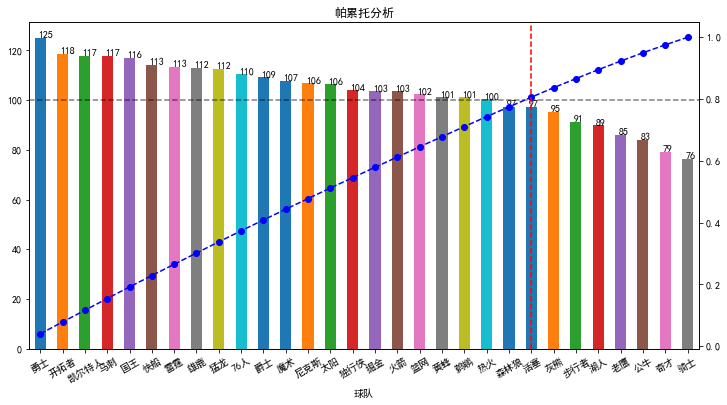

In [30]:
df_team = df.groupby('球队').sum().sort_values('18-19赛季得分')[['18-19赛季得分']]
df_team_sort = df_team['18-19赛季得分'].sort_values(ascending=False) # 按球队赛季得分排序

df_team_sort.plot.bar(figsize=(12,6),rot=30) # 柱状图

# 添加标签
x=len(df_team_sort)
y=df_team_sort
m=df_team_sort
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k')
    
plt.axhline(100,color='k',linestyle='--',alpha=0.5) # 100分处直线

# 累计占比
p = df_team_sort.cumsum() / df_team_sort.sum() 
p.plot(secondary_y=True,style='--ko',color='b',rot=30) 



# 帕累托点
key = p[p>0.8].index[0]
key_num = df_team_sort.index.tolist().index(key)
print('超过80%%累计占比的节点值索引为：%s'%key)
print('超过80%%累计占比的节点值索引位置为：%d'%key_num)
plt.axvline(key_num,color='r',linestyle='--')
plt.title('帕累托分析')
plt.savefig('帕累托分析-球队排名',bbox_inches='tight',dpi=300)


In [31]:
print('这些球队的得分占联盟的80%：')
print(df_team_sort.loc[:key])

这些球队的得分占联盟的80%：
球队
勇士      125.0
开拓者     118.6
凯尔特人    117.8
马刺      117.6
国王      116.8
快船      114.0
雷霆      113.3
雄鹿      112.9
猛龙      112.4
76人     110.4
爵士      109.2
魔术      107.8
尼克斯     106.7
太阳      106.3
独行侠     104.0
掘金      103.7
火箭      103.5
篮网      102.5
黄蜂      101.3
鹈鹕      101.3
热火      100.4
森林狼      97.3
活塞       97.2
Name: 18-19赛季得分, dtype: float64


In [32]:
a=np.array(df_team_sort.loc[:key].index)
a.resize(4,6)
pd.DataFrame(a,columns=list('帕累托分析：'))

,帕,累,托,分,析,：
0,勇士,开拓者,凯尔特人,马刺,国王,快船
1,雷霆,雄鹿,猛龙,76人,爵士,魔术
2,尼克斯,太阳,独行侠,掘金,火箭,篮网
3,黄蜂,鹈鹕,热火,森林狼,活塞,0


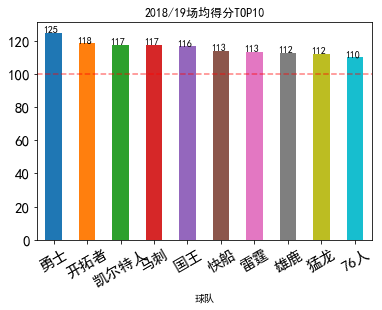

In [33]:
# TOP10

df_team_sort[:10].plot.bar(rot=30,title='2018/19场均得分TOP10',fontsize=15)
x=len(df_team_sort[:10])
y=df_team_sort[:10]
m=df_team_sort[:10]
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.3,j+0.01,'%i'%k,color='k')
plt.axhline(100,color='r',linestyle='--',alpha=0.5)
plt.savefig('Top10',bbox_inches='tight',dpi=300)

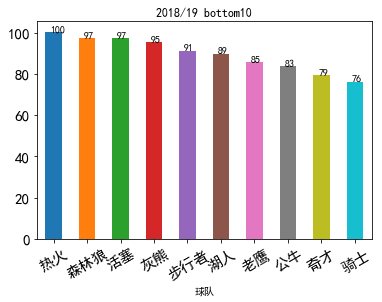

In [34]:
df_team_sort[-10:].plot.bar(rot=30,title='2018/19 bottom10',fontsize=15) # 柱状图

# 添加标签
x=len(df_team_sort[-10:])
y=df_team_sort[-10:]
m=df_team_sort[-10:]
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k')
plt.savefig('bottom10',bbox_inches='tight',dpi=300)

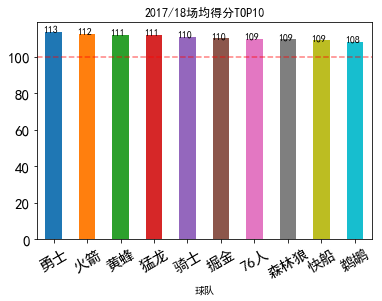

In [35]:
nba7_8_team_sort = nba7_8.sort_values('17-18赛季得分',ascending=False)[:10].set_index('球队')['17-18赛季得分']
nba7_8_team_sort.plot.bar(rot=30,title='2017/18场均得分TOP10',fontsize=15)
x = len(nba7_8_team_sort)
y = nba7_8_team_sort.values
z = nba7_8_team_sort.values
for i, j ,k in zip(range(x),y,z):
    plt.text(i-0.3,j,'%i'%k,color='k')
plt.axhline(100,alpha=0.5,linestyle='--',color='r')
plt.savefig('Top10_78',bbox_inches='tight',dpi=300)

**2.2 对比分析**
* 赛季得分，同比分析

In [36]:
df_merge_index = pd.merge(nba7_8[['17-18赛季得分','球队']],df_team,left_on='球队',right_index=True)
df_merge_index['差值']=df_merge_index['18-19赛季得分']-df_merge_index['17-18赛季得分']
df_merge_index.set_index('球队',inplace=True)

In [37]:
df_merge_index.to_csv('差值.csv')

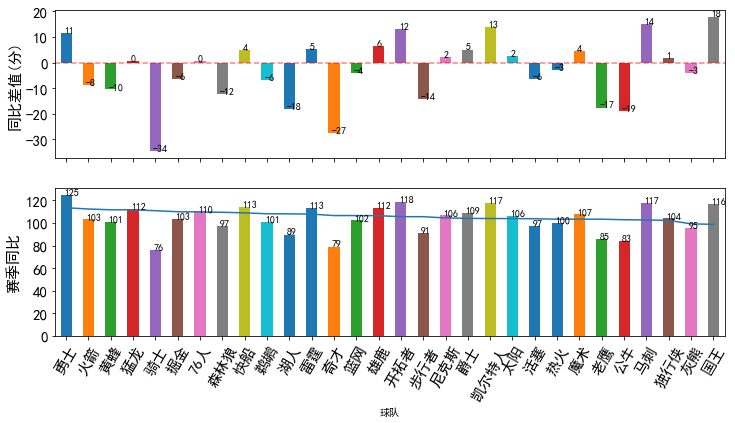

In [38]:
fig = plt.figure(figsize=(20,12))

ax2 = fig.add_subplot(2,1,2)
df_merge_index['17-18赛季得分'].plot(x='球队',ax=ax2)
df_merge_index['18-19赛季得分'].plot(kind='bar',figsize=(12,6),ax=ax2,fontsize=15,rot=60)
plt.ylabel('赛季同比',fontsize=15)

x=len(df_merge_index)
y=df_merge_index['18-19赛季得分']
m=df_merge_index['18-19赛季得分']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k')

ax1 = fig.add_subplot(2,1,1)
df_merge_index['差值'].plot(kind='bar',x='球队',sharex=True,fontsize=15,ax=ax1)
x=len(df_merge_index)
y=df_merge_index['差值']
m=df_merge_index['差值']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k')
plt.axhline(0,color='r',linestyle='--',alpha=0.5)
plt.ylabel('同比差值(分)',fontsize=15)

plt.savefig('同比分析-赛季得分_差值',bbox_inches='tight',dpi=300)

* 2018-19赛季（截止到目前）
    * 15支球队，得分能力出现下滑
    * 湖人队，同比下滑超过10分；
    * 骑士队本赛季下滑幅度最大；
    * 骑士队、奇才队本赛季平均得分，下滑幅度较大
        

** 2.3 分布分析: **

* 本赛季球队球员得分能力分布
* 两个赛季中，骑士队的得分手段分布和变化

In [39]:
ma_mi=df.groupby('球队')['18-19赛季得分'].apply(lambda x:x.max() - x.min()).sort_values(ascending=True)
for i, j, k in zip(ma_mi.index,ma_mi.values,range(1,len(ma_mi)+1)):
    print("%i.%s队 的极值差为:%.2f"%(k,i,j))

1.尼克斯队 的极值差为:8.80
2.步行者队 的极值差为:9.70
3.热火队 的极值差为:9.90
4.老鹰队 的极值差为:10.30
5.骑士队 的极值差为:10.50
6.灰熊队 的极值差为:12.50
7.掘金队 的极值差为:13.80
8.国王队 的极值差为:14.30
9.独行侠队 的极值差为:14.50
10.篮网队 的极值差为:14.60
11.湖人队 的极值差为:15.30
12.魔术队 的极值差为:16.50
13.奇才队 的极值差为:17.00
14.快船队 的极值差为:17.30
15.森林狼队 的极值差为:17.40
16.公牛队 的极值差为:17.60
17.黄蜂队 的极值差为:18.10
18.太阳队 的极值差为:18.40
19.爵士队 的极值差为:19.30
20.马刺队 的极值差为:19.40
21.开拓者队 的极值差为:20.30
22.凯尔特人队 的极值差为:20.50
23.雄鹿队 的极值差为:21.20
24.76人队 的极值差为:21.40
25.猛龙队 的极值差为:21.80
26.活塞队 的极值差为:23.50
27.雷霆队 的极值差为:23.90
28.鹈鹕队 的极值差为:24.50
29.勇士队 的极值差为:26.40
30.火箭队 的极值差为:29.10


In [40]:
df['得分能力'] = pd.cut(df['18-19赛季得分'],bins=[0,10,20,50,100],right=False,labels=['[0,10)','[10,20)','[20,50)','[50,100)'])
df.to_csv('NBA2018-19hupu_final.csv')

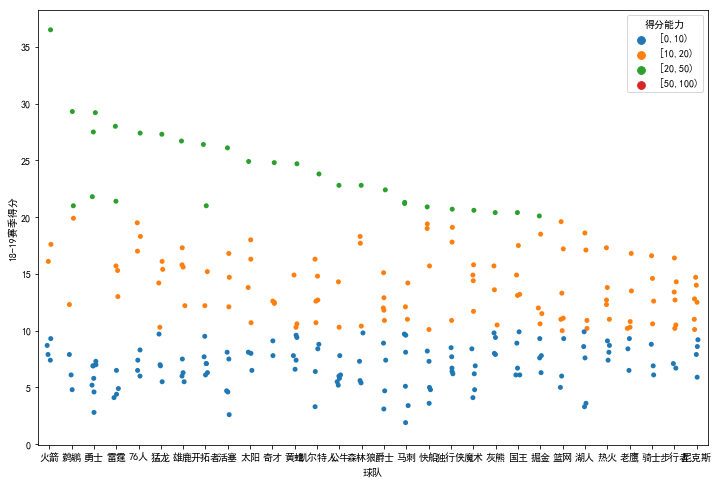

In [41]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
sns.stripplot(x=df['球队'],y=df['18-19赛季得分'],hue=df['得分能力'],jitter=True,ax=ax)
plt.savefig('分布分析-各球队球员得分能力分布散点图',bbox_inches='tight',dpi=300)

* 各球队场均得分20分以上的球员占少数
* 勇士拥有3名场均20分以上的球员
* 勇士拥有2名场均25分以上的球员

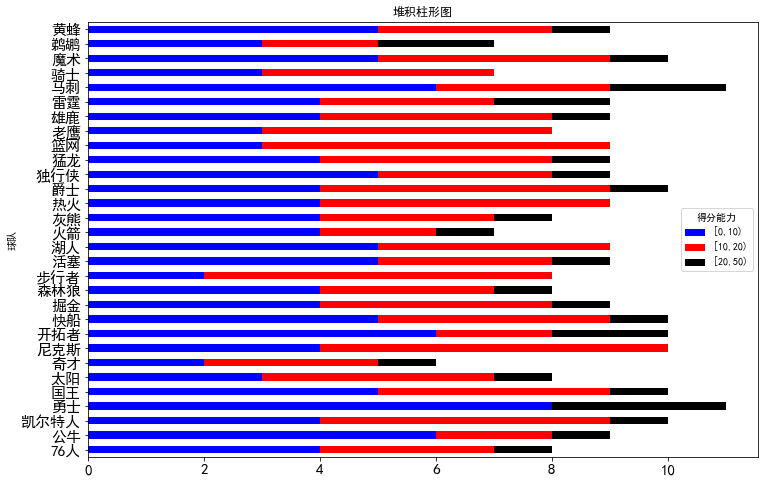

In [42]:
df_group_team = df.groupby(['球队','得分能力']).size().unstack()
df_group_team.plot.barh(stacked=True,figsize=(12,8),fontsize=15,color=['b','r','k'],title='堆积柱形图')
plt.savefig('分布分析-各球队球员得分能力堆积柱形图',bbox_inches='tight',dpi=300)

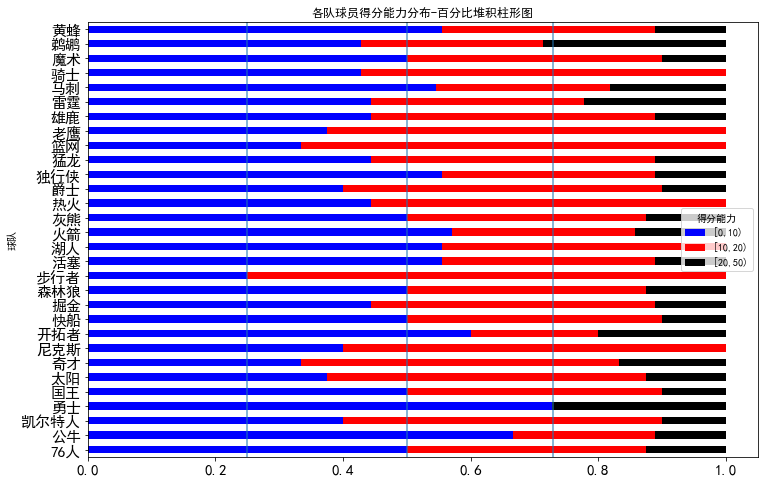

In [43]:
df_group_team.div(df_group_team.sum(1).astype(float),axis=0).plot.barh(stacked=True,fontsize=15,figsize=(12,8),color=['b','r','k'],title='各队球员得分能力分布-百分比堆积柱形图')
plt.axvline(x=0.5,alpha=0.7)
plt.axvline(x=0.73,alpha=0.7)
plt.axvline(x=0.25,alpha=0.7)
plt.savefig('分布分析百分比柱形图',bbox_inches='tight',dpi=300)

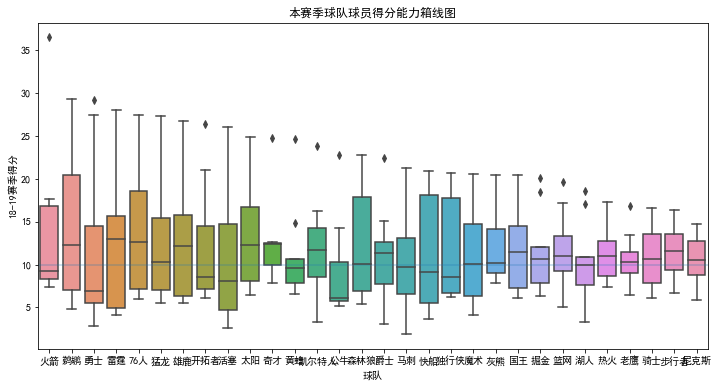

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x='球队',y='18-19赛季得分',data=df,width=.8)
plt.title('本赛季球队球员得分能力箱线图')
plt.axhline(y=10,alpha=0.3)
plt.savefig('分布分析-箱线图',bbox_inches='tight',dpi=300)

1. 勇士队
    * 球员分布，两极化
    * 73%的球员场均得分能力在10分以下
    * 27%的球员场均得分能力在20分以上
2. 步行者
    * 1/4的球员场均得分能力低于10分
    * 3/4的球员场均得分能力在：[10,20)
    
3. 大部分球队的球员的每场平均得分 中位数在10附近

上赛季前10名球队防守篮板能力都极强


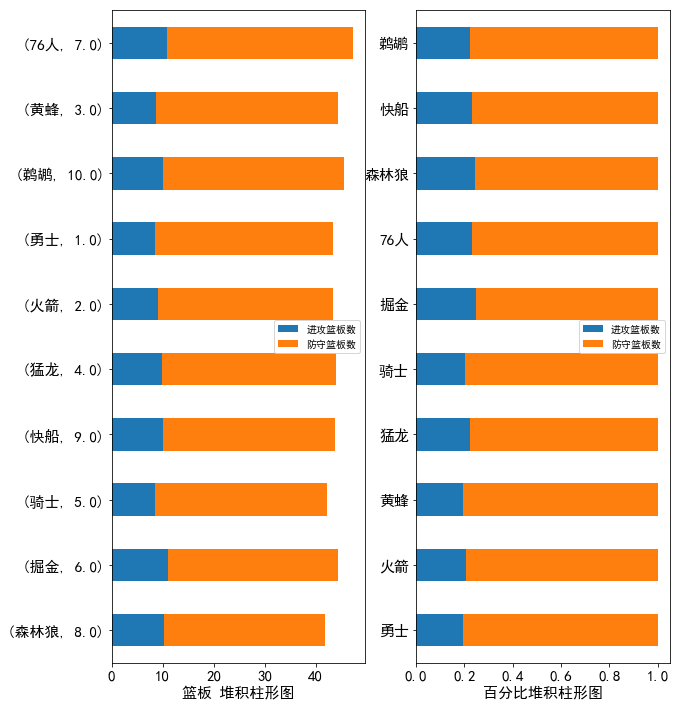

In [45]:
data_78_rb = nba7_8[['球队','进攻篮板数','防守篮板数','排名']]
data_78_rb.set_index(['球队','排名'],inplace=True)

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(1,2,1)
data_78_rb.iloc[:10].sort_values('防守篮板数',ascending=True).plot.barh(stacked=True,fontsize=15,figsize=(10,12),ax=ax1)
plt.ylabel('')
plt.xlabel('篮板 堆积柱形图',fontsize=15)

ax2 = fig.add_subplot(1,2,2)
data_78_rb_drop = data_78_rb.iloc[:10].reset_index(level=1).drop('排名',axis=1)
data_78_rb_drop.div(data_78_rb_drop.sum(1),axis=0).plot.barh(stacked=True,fontsize=15,ax=ax2)
plt.ylabel('')
plt.xlabel('百分比堆积柱形图',fontsize=15)

print('上赛季前10名球队防守篮板能力都极强')

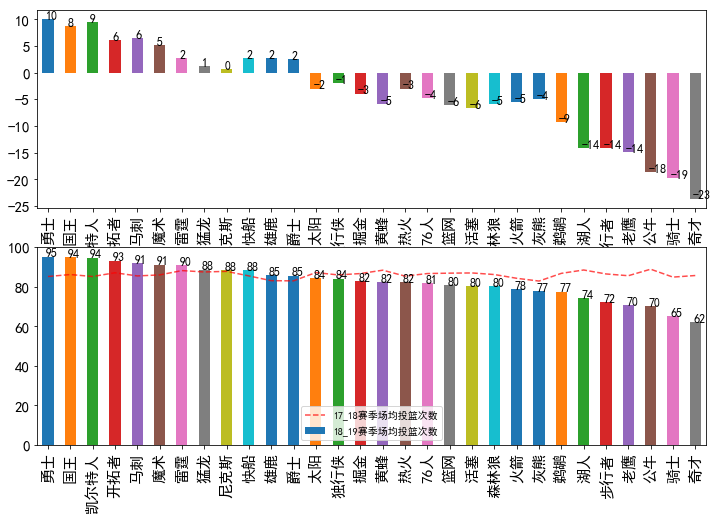

In [46]:

n_78 = nba7_8.set_index('球队')['17_18赛季场均投篮次数']
n_89 = df.groupby('球队')['18_19赛季场均投篮次数'].sum()
n_count = pd.DataFrame([n_78,n_89]).T.sort_values('18_19赛季场均投篮次数',ascending=False)
n_count['相对上赛季差值'] = n_count['18_19赛季场均投篮次数'] - n_count['17_18赛季场均投篮次数']

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(2,1,1)
n_count['相对上赛季差值'].plot.bar(ax=ax1,fontsize=15)
x = len(n_count)
y=n_count['相对上赛季差值']
m=n_count['相对上赛季差值']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k',fontsize=12)

ax2 = fig.add_subplot(2,1,2)
n_count['17_18赛季场均投篮次数'].plot(x=n_count.index,ax=ax2,color='r',linestyle='--',alpha=0.7)
n_count['18_19赛季场均投篮次数'].plot(x=n_count.index,kind='bar',figsize=(12,8),ax=ax2,fontsize=15)
x = len(n_count)
y=n_count['18_19赛季场均投篮次数']
m=n_count['18_19赛季场均投篮次数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k',fontsize=12)
    
plt.legend()
plt.savefig('赛季投篮次数',bbox_inches='tight',dpi=300)

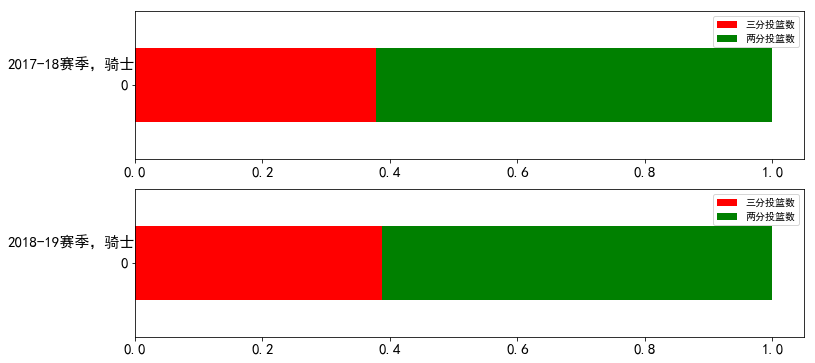

In [47]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)
data_78 = nba7_8[['球队','排名','三分投篮数','两分投篮数']]
data_78.set_index(['球队','排名'],inplace=True)
data_qs_78 = data_78.loc['骑士'].reset_index(drop=True)
data_qs_78.div(data_qs_78.sum(1),axis=0).plot.barh(stacked=True,fontsize=15,ax=ax1,color=['r','g','b'])
plt.text(-0.2,0.1,'2017-18赛季，骑士',fontsize=15)

ax2 = fig.add_subplot(2,1,2)
data_qs_89 = df.groupby('球队').get_group('骑士')[['三分投篮数','18_19赛季场均投篮次数']].sum()
data_qs_89 = pd.DataFrame(data_qs_89).T
data_qs_89['两分投篮数'] = data_qs_89['18_19赛季场均投篮次数']-data_qs_89['三分投篮数']-df.groupby('球队').get_group('骑士').sum()['罚球数']
data_qs_89.drop('18_19赛季场均投篮次数',axis=1,inplace=True)
data_qs_89.div(data_qs_89.sum(1),axis=0).plot.barh(stacked=True,fontsize=15,ax=ax2,color=['r','g','b'])
plt.text(-0.2,0.1,'2018-19赛季，骑士',fontsize=15)
plt.savefig('骑士队得分手段',bbox_inches='tight',dpi=300)


**2.4 相关性分析**

* 上场时间与投篮次数的相关性

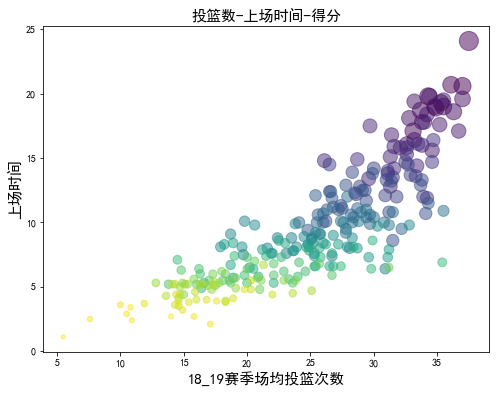

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(y=df['18_19赛季场均投篮次数'],s=df['18-19赛季得分']*10,x=df['上场时间'],alpha=0.5,c=df['球队'].index.tolist())
plt.xlabel('18_19赛季场均投篮次数',fontsize=15)
plt.ylabel('上场时间',fontsize=15)
plt.title('投篮数-上场时间-得分',fontsize=15)
plt.savefig('赛季投篮次数-上场时间',bbox_inches='tight',dpi=300)

In [49]:
df.groupby(['得分能力'])['上场时间'].describe()

,count,mean,std,min,25%,50%,75%,max
得分能力,,,,,,,,
"[0,10)",128.0,19.939844,5.371466,5.5,16.0,19.1,23.625,35.4
"[10,20)",109.0,28.259633,3.821652,17.9,26.0,28.3,31.200,35.5
"[20,50)",29.0,34.341379,1.718288,31.3,33.2,34.3,35.500,37.5
"[50,100)",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df[['上场时间','18-19赛季得分','18_19赛季场均投篮次数']].corr()

,上场时间,18-19赛季得分,18_19赛季场均投篮次数
上场时间,1.000000,0.824271,0.841955
18-19赛季得分,0.824271,1.000000,0.975880
18_19赛季场均投篮次数,0.841955,0.975880,1.000000


* 场均得分在20分以上的球员，上场时间的中位数为34.3分钟，均值为34.3分钟

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08EF1190>,
      dtype=object)

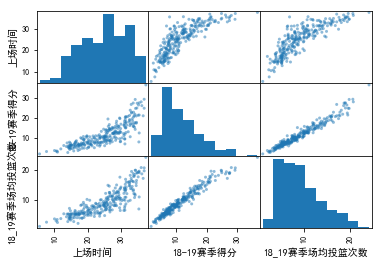

In [51]:
pd.plotting.scatter_matrix(df[['上场时间','18-19赛季得分','18_19赛季场均投篮次数']])

> 2019-03-12


> By：杨腾飞